<a href="https://colab.research.google.com/github/juliolynn/MNA_Advanced_ML_Methods_Group33/blob/main/A2b_DL_TC5033_AD2023_David_Mireles_Comentarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Advanced Machine Learning Methods (Gpo 10)**
###Tecnológico de Monterrey
###Proffesor Ph.D. José Antonio Cantoral Ceballos

## **Activity 2b**

###Building a CNN for CIFAR10 Dataset with PyTorch

##**Team 33**:

### Humberto Lozano Cedillo A01363184
### Julio Cesar Lynn Jimenez A01793660
### Sarah Mendoza Medina A01215352
### David Mireles Samaniego A01302935


# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

In [52]:
"Import all the libreries"
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt

"numpy: allows you to create a universal data structure to facilitate its analysis and exchange of various algorithms."
"torch: is a Python package that provides two high-level features:Tensor computation (like NumPy) with strong GPU acceleration Deep neural networks built on a tape-based autograd system"
"PyTorch contains torch.nn module is used to train and build the layers of neural networks such as input, hidden, and output. Torch.nn base class helps wrap the torch's parameters, functions, and layers.nn module"
"torch.nn.functional Applies a 1D convolution on an input signal composed of several input planes"
"torch.utils.data Sampler classes are used to specify the sequence of indices/keys used in data loading, tamnien permite hacer muestras a partir de nuestras dataloader"
"import torchvision.transforms as T The transformations that accept tensor images also accept batches of tensor images. A Tensor Image is a tensor with (C, H, W)"
"matplotlib allows you to create and customize the most common types of charts, including bar charts, line charts, histograms, scatterplots, and more"

'matplotlib allows you to create and customize the most common types of charts, including bar charts, line charts, histograms, scatterplots, and more'

In [ ]:
#only if you have jupyterthemes
from jupyterthemes import jtplot
jtplot.style()

### Download Cifar10 dataset

In [54]:
torch.cuda.is_available()

False

In [67]:
DATA_PATH = '/mnt/c/datasets/CIFAR10/' # We import the database CIFAR10 images of 32 x 32
NUM_TRAIN = 50000                      # training constant
NUM_VAL = 5000                         # Validation constant
NUM_TEST = 5000                        # Testing constant
MINIBATCH_SIZE = 64                    # Mini Batch

transform_cifar = T.Compose([          # we make transformations to images (Data Augmentation)
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])   # [Normaliza all data chanels: red, geen & blue], [mean and standard deviation] for database CIFAR10
            ])

# Train dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))  # In this part we create the training objects
#Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))      # In this part we create the validation objects
#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))  # # In this part we create the testing objects

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [68]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /mnt/c/datasets/CIFAR10/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [69]:
train_loader.batch_size

64

In [72]:
for i, (x, y) in enumerate(train_loader): # we visualize the data training x & y
    print(x, y)

Se han truncado las últimas 5000 líneas del flujo de salida.
          [ 2.3490e-01,  1.7139e-01,  1.8727e-01,  ...,  4.5717e-01,
            4.0954e-01,  4.0954e-01],
          ...,
          [-4.3193e-01, -4.1605e-01, -3.2079e-01,  ..., -9.8762e-01,
           -8.9236e-01, -8.2885e-01],
          [-5.4307e-01, -4.3193e-01, -4.1605e-01,  ..., -9.8762e-01,
           -8.6060e-01, -8.4472e-01],
          [-5.2719e-01, -5.4307e-01, -6.8596e-01,  ..., -9.5586e-01,
           -8.9236e-01, -8.1297e-01]],

         [[ 3.3729e-02, -3.0824e-02, -1.4686e-02,  ...,  6.4698e-01,
            6.1470e-01,  5.8243e-01],
          [ 8.2143e-02,  1.4525e-03,  1.7591e-02,  ...,  6.7925e-01,
            6.9539e-01,  6.9539e-01],
          [ 1.1442e-01,  6.6005e-02,  8.2143e-02,  ...,  7.2767e-01,
            6.9539e-01,  7.1153e-01],
          ...,
          [-3.6972e-01, -3.5359e-01, -2.5676e-01,  ..., -1.0314e+00,
           -9.9911e-01, -9.5070e-01],
          [-4.5042e-01, -3.3745e-01, -3.2131e-01,  

### Using  GPUs

In [73]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cpu


### Display sample image

Sampled image represents a: horse


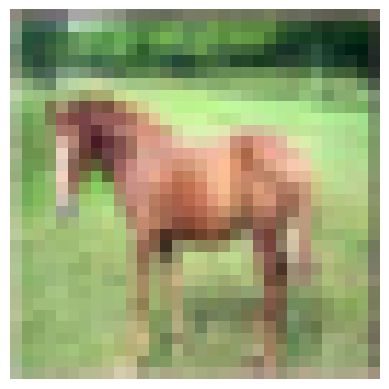

In [76]:
classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'Sampled image represents a: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)
# we show a single random image

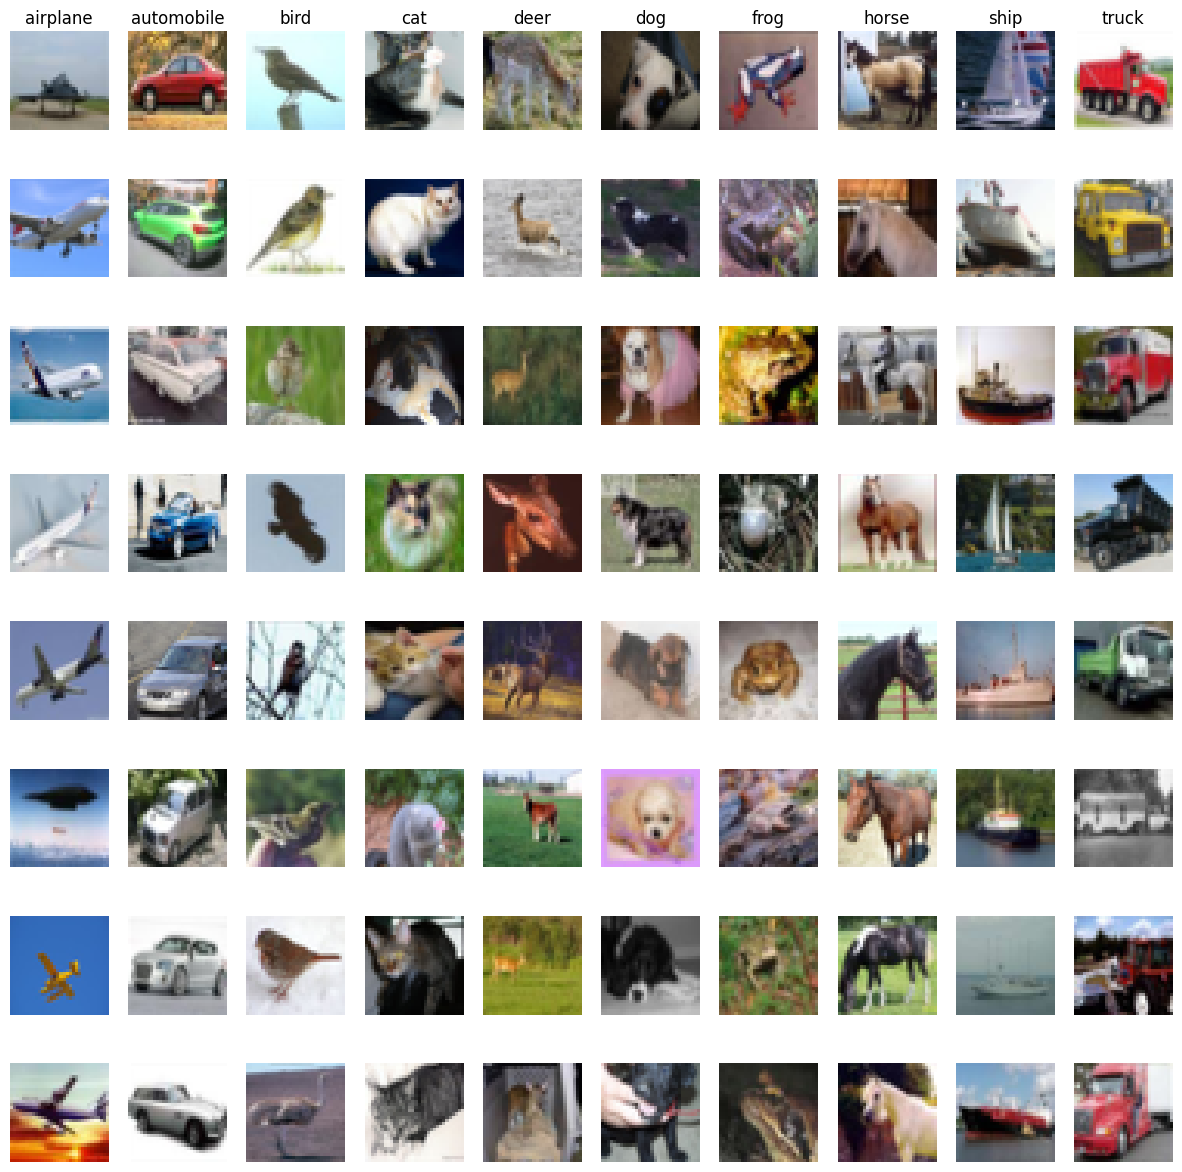

In [ ]:
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')

            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid()
# We show a random image matrix 10 rows 8 columns

### Function to calculate accuracy


In [77]:
def accuracy(model, loader):
    num_correct = 0
    num_total = 0
    model.eval() # Change to evaluation mode to use train data normalization
    model = model.to(device=device)
    with torch.no_grad():
        for xi, yi in loader:    # Loop through minibatches of input data 'x' and corresponding labels 'y'
            xi = xi.to(device=device, dtype = torch.float32)  # Forward pass: Use the model to make predictions
            yi = yi.to(device=device, dtype = torch.long)     # Count the number of correct predictions in the minibatch by comparing the predicted class indices with the true labels
            scores = model(xi)
            _, pred = scores.max(dim=1)
            num_correct += (pred == yi).sum()
            num_total += pred.size(0)                         # Increment the total count by the number of examples in the minibatch
        return float(num_correct)/num_total

### Training loop

In [78]:
def train(model, optimiser, epochs=100):              # We Define the moldel, optimiser & epochs
    model = model.to(device=device)
    for epoch in range(epochs):
        for _, (xi, yi) in enumerate(train_loader):      # Loop through train_loader
            model.train()
            xi = xi.to(device=device, dtype=torch.float32)     # Forward pass: Use the model to make predictions
            yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi)
            cost = F.cross_entropy(input= scores, target=yi)    # Defien cost function
            optimiser.zero_grad()                               # Calculate Gradient
            cost.backward()
            optimiser.step()                                    # Defien step
        acc = accuracy(model, val_loader)                       # Call validation data for accuracy
        print(f'Epoch: {epoch}, cost: {cost.item()}, accuracy: {acc},')       # print epoch, cost an accuracy

### Linear model

In [81]:
first_img = test_loader.dataset[0][0]
first_img.shape

torch.Size([3, 32, 32])

In [ ]:
colors, width, height = first_img.shape

In [80]:
# PyTorch linear model to have an initial baseline model

hidden1 = 256   # Number of Neurons
hidden = 256
lr = 1e-3 # smaller learning rate and 20 epochs to allow smaller and more accurate steps.
epochs = 10
in_features = colors * width * height
model1 = nn.Sequential(nn.Flatten(),
                       nn.Linear(in_features=in_features, out_features=hidden1), nn.ReLU(), # Define  nn.ReLU activation function
                       nn.Linear(in_features=hidden1, out_features=hidden), nn.ReLU(),
                       nn.Linear(in_features=hidden, out_features=10))
optimiser = torch.optim.Adam(model1.parameters(), lr=lr)   # We use Adam optmiser whit learning rate (Lr)


In [82]:
train(model1, optimiser, epochs)

Epoch: 0, cost: 1.8212817907333374, accuracy: 0.4714,
Epoch: 1, cost: 1.6550641059875488, accuracy: 0.4904,
Epoch: 2, cost: 1.2865556478500366, accuracy: 0.5008,
Epoch: 3, cost: 1.1892927885055542, accuracy: 0.5204,
Epoch: 4, cost: 1.5435762405395508, accuracy: 0.5264,
Epoch: 5, cost: 1.2365552186965942, accuracy: 0.518,
Epoch: 6, cost: 1.304801344871521, accuracy: 0.5208,
Epoch: 7, cost: 0.9925529360771179, accuracy: 0.5254,
Epoch: 8, cost: 0.68032306432724, accuracy: 0.5276,
Epoch: 9, cost: 0.563410758972168, accuracy: 0.5092,


In [ ]:
accuracy(model1, test_loader)

0.5122

Test dataset Accuracy using lr = 1e-3 and epochs = 10

0.5194

### Sequential CNN

In [83]:
# PyTorch CNN model, accuracy should be better than the linear model
# Convolutional neural network Sequential
channel1 = 16       # 1th layer size 16 Filter
channel2 = 32       # 2th layer size 32 Filter
epochs = 10         # 10 epochs
lr = 0.0001         # learning rate
kernel_size = 3 # Commonly used kernel sizes are 3 and 5
modelCNN1 = nn.Sequential(nn.Conv2d(in_channels=colors, out_channels=channel1,        # Define modelCNN1 1th layer
                                   kernel_size=kernel_size, padding=1),                 # 1th layer
                          nn.ReLU(),                                                  # nn.ReLU activation function
                          nn.Conv2d(in_channels=channel1, out_channels=channel2,        # 2th layer
                                    kernel_size= kernel_size, padding=1),
                          nn.ReLU(),
                          nn.MaxPool2d(2, 2),
                          nn.Flatten(),
                          nn.Linear(in_features=16*16*channel2, out_features=10)      # linear layer
                                   )
optimiser = torch.optim.Adam(modelCNN1.parameters(), lr)                              #define optimiser whit Adam ,model CNN1 and learning rate

In [84]:
train(modelCNN1, optimiser, epochs)

Epoch: 0, cost: 1.3165595531463623, accuracy: 0.4736,
Epoch: 1, cost: 1.42905855178833, accuracy: 0.5332,
Epoch: 2, cost: 1.059425711631775, accuracy: 0.5506,
Epoch: 3, cost: 1.1954660415649414, accuracy: 0.5722,
Epoch: 4, cost: 1.2026729583740234, accuracy: 0.5712,
Epoch: 5, cost: 1.5007569789886475, accuracy: 0.5948,
Epoch: 6, cost: 0.789127767086029, accuracy: 0.602,
Epoch: 7, cost: 1.7104148864746094, accuracy: 0.6158,
Epoch: 8, cost: 0.8719704151153564, accuracy: 0.6158,
Epoch: 9, cost: 0.9159755110740662, accuracy: 0.6244,


In [ ]:
accuracy(modelCNN1, test_loader)

0.6208

Indeed, the simple CNN model performed better than the linear model with a test dataset accuracy of 0.6272

### Sequential CNN with Kaiming initialization and Batch normalization

In [ ]:
# Custom weight
def weights_init(m):
    if isinstance(m, nn.Conv2d):
        torch.nn.init.kaiming_uniform_(m.weight)

In [ ]:
# Convolutional neural network Sequential

channel1 = 16                    # 1th layer size 16 Filter
channel2 = 32                    # 2th layer size 32 Filter
channel3 = 64                    # 3th layer size 64 Filter
channel4 = 128                   # 4th layer size 128 Filter
epochs = 10                      # 10 epochs
lr = 0.0001                      # learning rate
kernel_size = 3 # Commonly used kernel sizes are 3 and 5
modelCNN2 = nn.Sequential(nn.Conv2d(in_channels=colors, out_channels=channel1,     # Define modelCNN2 1th layer
                                   kernel_size=kernel_size, padding=1),            # 1th layer
                          nn.ReLU(),                                               # nn.ReLU activation function
                          nn.BatchNorm2d(channel1),
                          nn.Conv2d(in_channels=channel1, out_channels=channel2,
                                    kernel_size= kernel_size, padding=1),
                          nn.ReLU(),
                          nn.BatchNorm2d(channel2),
                          nn.MaxPool2d(2, 2),
                          nn.Flatten(),
                          nn.Linear(in_features=16*16*channel4, out_features=10) # 16*16 comes from the original img size of 32*32 divided by 2 because of MaxPool2d
                          )

modelCNN2.apply(weights_init)

optimiser = torch.optim.Adam(modelCNN2.parameters(), lr)    #define optimiser whit Adam,model CNN2 and learning rate

In [ ]:
train(modelCNN1, optimiser, epochs)

Epoch: 0, cost: 0.8680264949798584, accuracy: 0.6386,
Epoch: 1, cost: 0.6568180918693542, accuracy: 0.6386,
Epoch: 2, cost: 0.9586211442947388, accuracy: 0.6386,
Epoch: 3, cost: 0.8906223773956299, accuracy: 0.6386,
Epoch: 4, cost: 0.9606963992118835, accuracy: 0.6386,
Epoch: 5, cost: 1.26374351978302, accuracy: 0.6386,
Epoch: 6, cost: 1.0930124521255493, accuracy: 0.6386,
Epoch: 7, cost: 0.9870490431785583, accuracy: 0.6386,
Epoch: 8, cost: 0.9260628819465637, accuracy: 0.6386,
Epoch: 9, cost: 1.1042534112930298, accuracy: 0.6386,


In [ ]:
accuracy(modelCNN2, test_loader)

Test dataset accuracy of 0.633

### Sequential CNN with Kaiming initialization, Batch normalization and mirroring the hidden layers.

Mirroring the original model of Conv2d/ReLU/BatchNorm2d/Conv2d/ReLU/BatchNorm2d/MaxPool2d hidden layers before the fully connected output layer.

In [ ]:
channel1 = 16               # 1th layer size 16 Filter
channel2 = 32               # 2th layer size 32 Filter
channel3 = 64               # 3th layer size 64 Filter
channel4 = 128              # 4th layer size 128 Filter
epochs = 10                 # 10 epochs
lr = 0.001                  # learning rate
kernel_size = 3 # Commonly used kernel sizes are 3 and 5
modelCNN3 = nn.Sequential(nn.Conv2d(in_channels=colors, out_channels=channel1,          # 1th layer & Define modelCNN3
                                   kernel_size=kernel_size, padding=1),
                          nn.ReLU(),                                                    # nn.ReLU activation function
                          nn.BatchNorm2d(channel1),
                          nn.Conv2d(in_channels=channel1, out_channels=channel2,
                                    kernel_size= kernel_size, padding=1),
                          nn.ReLU(),                                                    # 2th layer
                          nn.BatchNorm2d(channel2),
                          nn.MaxPool2d(2, 2),

                          nn.Conv2d(in_channels=channel2, out_channels=channel4,
                                   kernel_size=kernel_size, padding=1),
                          nn.ReLU(),                                                     # 3th layer
                          nn.BatchNorm2d(channel4),
                          nn.Conv2d(in_channels=channel4, out_channels=channel4,
                                    kernel_size= kernel_size, padding=1),
                          nn.ReLU(),                                                     # 4th layer
                          nn.BatchNorm2d(channel4),
                          nn.MaxPool2d(2, 2),

                          nn.Flatten(),
                          nn.Linear(in_features=8*8*channel4, out_features=10), # 8*8 comes from the original img size of 32*32 divided by 4 because of the 2 MaxPool2d layers
                          )

modelCNN3.apply(weights_init)

optimiser = torch.optim.Adam(modelCNN3.parameters(), lr)   #define optimiser whit Adam,model CNN3 and learning rate

In [ ]:
modelCNN3

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU()
  (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU()
  (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (14): Flatten(start_dim=1, end_dim=-1)
  (15): Linear(in_features=1000, out_features=10, bias=True)
)

In [ ]:
train(modelCNN3, optimiser, epochs)

Epoch: 0, cost: 1.1525466442108154, accuracy: 0.6924,
Epoch: 1, cost: 0.42629769444465637, accuracy: 0.7468,
Epoch: 2, cost: 0.5524331331253052, accuracy: 0.773,
Epoch: 3, cost: 0.3956542909145355, accuracy: 0.766,
Epoch: 4, cost: 0.4472614824771881, accuracy: 0.7656,
Epoch: 5, cost: 0.23362629115581512, accuracy: 0.7692,
Epoch: 6, cost: 0.010792259126901627, accuracy: 0.7742,
Epoch: 7, cost: 0.3194412291049957, accuracy: 0.7692,
Epoch: 8, cost: 0.022246794775128365, accuracy: 0.7562,
Epoch: 9, cost: 0.4270065724849701, accuracy: 0.761,


In [ ]:
accuracy(modelCNN3, test_loader)

0.7668

Test dataset accurcy of 0.7606

### New trainin loop that saves the training history

In [ ]:
def train_with_history(model, optimiser, epochs=100):
    model = model.to(device=device)

    loss_hist_train = [0] * epochs
    accuracy_hist_train = [0] * epochs
    loss_hist_valid = [0] * epochs
    accuracy_hist_valid = [0] * epochs

    for epoch in range(epochs):
        model.train()
        num_correct = 0
        num_total = 0
        for _, (xi, yi) in enumerate(train_loader):
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi)
            cost = F.cross_entropy(input= scores, target=yi)
            _, pred = scores.max(dim=1)
            optimiser.zero_grad()
            cost.backward()
            optimiser.step()

            loss_hist_train[epoch] += cost.item()
            num_correct += (pred == yi).sum()
            num_total += pred.size(0)

        loss_hist_train[epoch] /= len(train_loader.dataset)
        accuracy_hist_train[epoch] = float(num_correct)/num_total

        model.eval() # Change to evaluation mode to use train data normalization
        model = model.to(device=device)
        with torch.no_grad():
            num_correct = 0
            num_total = 0
            for xi, yi in val_loader:
                xi = xi.to(device=device, dtype = torch.float32)
                yi = yi.to(device=device, dtype = torch.long)
                scores = model(xi)
                cost = F.cross_entropy(input= scores, target=yi)
                _, pred = scores.max(dim=1)

                loss_hist_valid[epoch] += cost.item()
                num_correct += (pred == yi).sum()
                num_total += pred.size(0)

            loss_hist_valid[epoch] /= len(val_loader.dataset)
            accuracy_hist_valid[epoch] = float(num_correct)/num_total

        print(f'Epoch: {epoch}, train_loss: {loss_hist_train[epoch]}, train_accuracy: {accuracy_hist_train[epoch]}, val_loss: {loss_hist_valid[epoch]}, val_accuracy: {accuracy_hist_valid[epoch]}')

    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

In [ ]:
hist = train_with_history(modelCNN3, optimiser, epochs)

Epoch: 0, train_loss: 0.022868652594089506, train_accuracy: 0.56714, val_loss: 0.007904588752985001, val_accuracy: 0.677
Epoch: 1, train_loss: 0.013540989521741867, train_accuracy: 0.7164, val_loss: 0.006796123944222927, val_accuracy: 0.7272
Epoch: 2, train_loss: 0.01012072908550501, train_accuracy: 0.78198, val_loss: 0.006304649937152863, val_accuracy: 0.7476
Epoch: 3, train_loss: 0.007713983080685139, train_accuracy: 0.82998, val_loss: 0.006280250337719917, val_accuracy: 0.7522
Epoch: 4, train_loss: 0.005758415548950434, train_accuracy: 0.87222, val_loss: 0.006749557054042816, val_accuracy: 0.7592
Epoch: 5, train_loss: 0.004197986249923706, train_accuracy: 0.90614, val_loss: 0.0073713576793670655, val_accuracy: 0.7458
Epoch: 6, train_loss: 0.0030236582209914923, train_accuracy: 0.93258, val_loss: 0.008464749908447266, val_accuracy: 0.7484
Epoch: 7, train_loss: 0.002553381121456623, train_accuracy: 0.94224, val_loss: 0.00888786254823208, val_accuracy: 0.7522
Epoch: 8, train_loss: 0.00

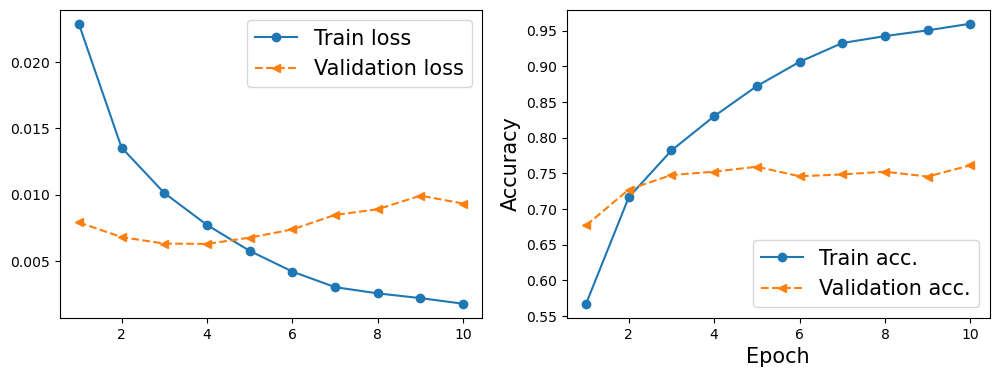

In [ ]:
x_arr = np.arange(len(hist[0])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

Overfitting?

In [ ]:
channel1 = 16          # 1th layer size 16 Filter
channel2 = 32          # 2th layer size 32 Filter
channel3 = 64          # 3th layer size 64 Filter
channel4 = 128         # 4th layer size 128 Filter
epochs = 10            # 10 epoch
lr = 0.001             # learning rate
kernel_size = 3 # Commonly used kernel sizes are 3 and 5
modelCNN4 = nn.Sequential(nn.Conv2d(in_channels=colors, out_channels=channel1,                  # 1th layer & Define modelCNN4
                                   kernel_size=kernel_size, padding=1),
                          nn.ReLU(),                                                            # nn.ReLU activation function
                          nn.BatchNorm2d(channel1),
                          nn.Conv2d(in_channels=channel1, out_channels=channel2,
                                    kernel_size= kernel_size, padding=1),
                          nn.ReLU(),                                                            # 2th layer
                          nn.BatchNorm2d(channel2),
                          nn.MaxPool2d(2, 2),
                          nn.Dropout(p=0.5),

                          nn.Conv2d(in_channels=channel2, out_channels=channel4,
                                   kernel_size=kernel_size, padding=1),
                          nn.ReLU(),                                                            # 3th layer
                          nn.BatchNorm2d(channel4),
                          nn.Conv2d(in_channels=channel4, out_channels=channel4,
                                    kernel_size= kernel_size, padding=1),
                          nn.ReLU(),
                          nn.BatchNorm2d(channel4),                                             # 4th layer
                          nn.MaxPool2d(2, 2),
                          nn.Dropout(p=0.5),

                          nn.Flatten(),
                          nn.Linear(in_features=8*8*channel4, out_features=10), # 8*8 comes from the original img size of 32*32 divided by 4 because of the 2 MaxPool2d layers
                          )

modelCNN4.apply(weights_init)

optimiser = torch.optim.Adam(modelCNN4.parameters(), lr)                                      #define optimiser whit Adam,model CNN4 and learning rate

In [ ]:
hist_CNN4 = train_with_history(modelCNN4, optimiser, epochs)

Epoch: 0, train_loss: 0.02952159230351448, train_accuracy: 0.46176, val_loss: 0.011170504575967789, val_accuracy: 0.5514
Epoch: 1, train_loss: 0.020357359471321106, train_accuracy: 0.58502, val_loss: 0.0081962397813797, val_accuracy: 0.6572
Epoch: 2, train_loss: 0.0161562573993206, train_accuracy: 0.64698, val_loss: 0.007965868109464645, val_accuracy: 0.6568
Epoch: 3, train_loss: 0.014057844276428222, train_accuracy: 0.6864, val_loss: 0.006862029200792313, val_accuracy: 0.6976
Epoch: 4, train_loss: 0.012838505284190178, train_accuracy: 0.71364, val_loss: 0.006774433121085167, val_accuracy: 0.713
Epoch: 5, train_loss: 0.012072987559437752, train_accuracy: 0.73286, val_loss: 0.006187775897979736, val_accuracy: 0.7396
Epoch: 6, train_loss: 0.011294556918740272, train_accuracy: 0.7471, val_loss: 0.0059083255141973495, val_accuracy: 0.7514
Epoch: 7, train_loss: 0.010665766937732697, train_accuracy: 0.75972, val_loss: 0.005766084915399552, val_accuracy: 0.7616
Epoch: 8, train_loss: 0.0101643

In [ ]:
def plot_learning_curves(hist):
    x_arr = np.arange(len(hist[0])) + 1
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(x_arr, hist[0], '-o', label='Train loss')
    ax.plot(x_arr, hist[1], '--<', label='Validation loss')
    ax.legend(fontsize=15)
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(x_arr, hist[2], '-o', label='Train acc.')
    ax.plot(x_arr, hist[3], '--<', label='Validation acc.')
    ax.legend(fontsize=15)
    ax.set_xlabel('Epoch', size=15)
    ax.set_ylabel('Accuracy', size=15)
    plt.show()

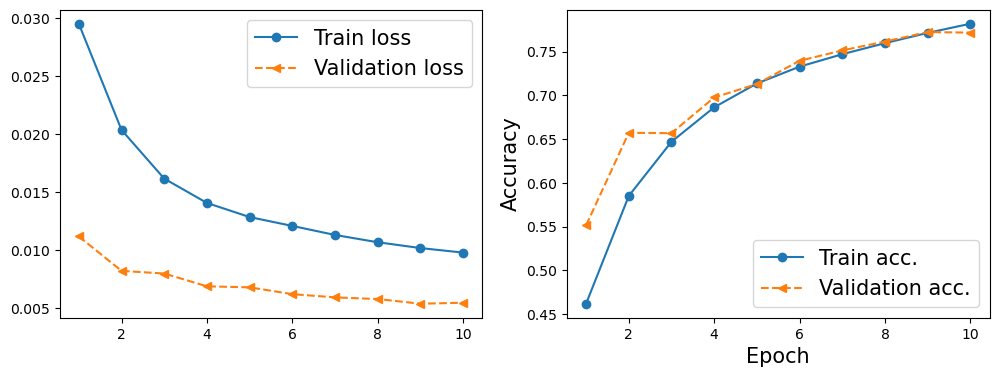

In [ ]:
plot_learning_curves(hist_CNN4)

In [ ]:
accuracy(modelCNN4, test_loader)

0.7752

Now that we are happy with our learning curves and the test dataset accuracy is also the acceptable 0.77

In [ ]:
hist_CNN4_2nd_training = train_with_history(modelCNN4, optimiser, 20)

Epoch: 0, train_loss: 0.009280505081415176, train_accuracy: 0.7929, val_loss: 0.005192681941390037, val_accuracy: 0.7796
Epoch: 1, train_loss: 0.008945824627280234, train_accuracy: 0.8001, val_loss: 0.004743847846984863, val_accuracy: 0.7998
Epoch: 2, train_loss: 0.008583198948800564, train_accuracy: 0.80668, val_loss: 0.004864443281292916, val_accuracy: 0.8002
Epoch: 3, train_loss: 0.008345445485711098, train_accuracy: 0.81382, val_loss: 0.004726248874515295, val_accuracy: 0.8036
Epoch: 4, train_loss: 0.008076725870966911, train_accuracy: 0.81772, val_loss: 0.004869215020537376, val_accuracy: 0.7968
Epoch: 5, train_loss: 0.007924861250817776, train_accuracy: 0.82332, val_loss: 0.004702667897939682, val_accuracy: 0.8054
Epoch: 6, train_loss: 0.007620398698151112, train_accuracy: 0.82916, val_loss: 0.004666298431158066, val_accuracy: 0.8106
Epoch: 7, train_loss: 0.00749389413535595, train_accuracy: 0.82956, val_loss: 0.004695839920639992, val_accuracy: 0.8068
Epoch: 8, train_loss: 0.007

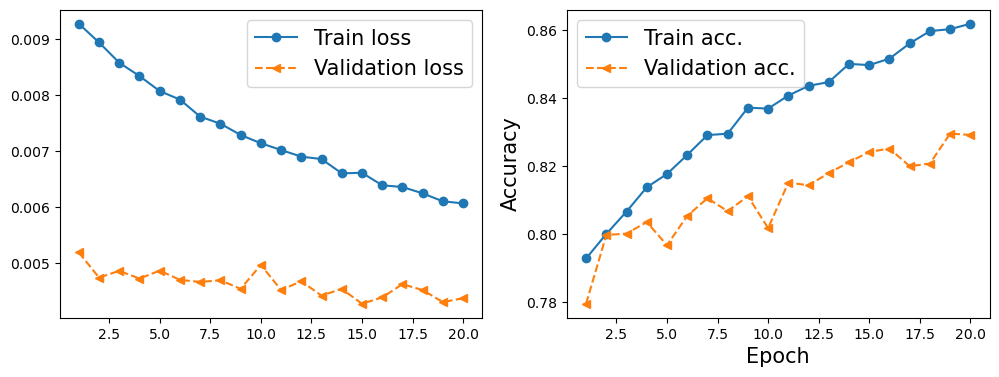

In [ ]:
plot_learning_curves(hist_CNN4_2nd_training)

In [ ]:
accuracy(modelCNN4, test_loader)

0.8302

### AlexNet
The first convolutional layer filters the 224 × 224 × 3 input image with 96 kernels of size 11 × 11 × 3 with a stride of 4 pixels.
The second convolutional layer takes as input the (response-normalized and pooled) output of the first convolutional layer and filters it with 256 kernels of size 5 × 5 × 48.
The third, fourth, and fifth convolutional layers are connected to one another without any intervening pooling or normalization layers.
The third convolutional layer has 384 kernels of size 3 × 3 × 256 connected to the (normalized, pooled) outputs of the second convolutional layer.
The fourth convolutional layer has 384 kernels of size 3 × 3 × 192 , and the fifth convolutional layer has 256 kernels of size 3 × 3 × 192.
The fully-connected layers have 4096 neurons each.

In [ ]:
epochs = 20
lr = 0.0001
momentum = 0.9
AlexNet = nn.Sequential(
                        # First conv
                        nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
                        nn.BatchNorm2d(96),
                        nn.ReLU(),
                        nn.MaxPool2d(kernel_size=3, stride=2),
                        nn.Dropout(p=0.5),

                        # Second conv
                        nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),
                        nn.BatchNorm2d(256),
                        nn.ReLU(),
                        nn.MaxPool2d(kernel_size=3, stride=2),
                        nn.Dropout(p=0.5),

                        # Third conv
                        nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
                        nn.ReLU(),

                        # Fourth conv
                        nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
                        nn.ReLU(),

                        # Fifth conv
                        nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
                        nn.ReLU(),

                        # Sixth linear
                        nn.Flatten(),
                        nn.Linear(in_features=256, out_features=4096),
                        nn.ReLU(),
                        nn.Dropout(0.5),

                        # Seventh linear
                        nn.Linear(in_features=4096, out_features=4096),
                        nn.ReLU(),
                        nn.Dropout(0.5),

                        # Eighth linear
                        nn.Linear(in_features=4096, out_features=10),
                        )

AlexNet.apply(weights_init)

optimiser = torch.optim.Adam(AlexNet.parameters(), lr, weight_decay = 0.005)

In [ ]:
hist_AlexNet = train_with_history(AlexNet, optimiser, epochs)

Epoch: 0, train_loss: 0.030899528920650482, train_accuracy: 0.22028, val_loss: 0.01440749522447586, val_accuracy: 0.2742
Epoch: 1, train_loss: 0.028158346903324128, train_accuracy: 0.28444, val_loss: 0.013453242444992065, val_accuracy: 0.322
Epoch: 2, train_loss: 0.02748980397939682, train_accuracy: 0.30136, val_loss: 0.013149397146701812, val_accuracy: 0.3362
Epoch: 3, train_loss: 0.02693254907131195, train_accuracy: 0.3182, val_loss: 0.012921329247951507, val_accuracy: 0.361
Epoch: 4, train_loss: 0.026516242945194245, train_accuracy: 0.33396, val_loss: 0.012573951470851899, val_accuracy: 0.3744
Epoch: 5, train_loss: 0.02609447478532791, train_accuracy: 0.34792, val_loss: 0.012213048493862151, val_accuracy: 0.4066
Epoch: 6, train_loss: 0.02547372795343399, train_accuracy: 0.37288, val_loss: 0.011956875824928284, val_accuracy: 0.4246
Epoch: 7, train_loss: 0.024890263383388518, train_accuracy: 0.39068, val_loss: 0.011612967240810394, val_accuracy: 0.4338
Epoch: 8, train_loss: 0.02439016

Original learning rate of 0.005 would end up converging on an accuracy of 0.30~
Switching to a learning rate of 0.0001 helped achieving an accuarcy of 0.60~


original epochs:
Epoch: 0, train_loss: 0.030899528920650482, train_accuracy: 0.22028, val_loss: 0.01440749522447586, val_accuracy: 0.2742
Epoch: 1, train_loss: 0.028158346903324128, train_accuracy: 0.28444, val_loss: 0.013453242444992065, val_accuracy: 0.322
Epoch: 2, train_loss: 0.02748980397939682, train_accuracy: 0.30136, val_loss: 0.013149397146701812, val_accuracy: 0.3362
Epoch: 3, train_loss: 0.02693254907131195, train_accuracy: 0.3182, val_loss: 0.012921329247951507, val_accuracy: 0.361
Epoch: 4, train_loss: 0.026516242945194245, train_accuracy: 0.33396, val_loss: 0.012573951470851899, val_accuracy: 0.3744
Epoch: 5, train_loss: 0.02609447478532791, train_accuracy: 0.34792, val_loss: 0.012213048493862151, val_accuracy: 0.4066
Epoch: 6, train_loss: 0.02547372795343399, train_accuracy: 0.37288, val_loss: 0.011956875824928284, val_accuracy: 0.4246
Epoch: 7, train_loss: 0.024890263383388518, train_accuracy: 0.39068, val_loss: 0.011612967240810394, val_accuracy: 0.4338
Epoch: 8, train_loss: 0.024390169281959535, train_accuracy: 0.40296, val_loss: 0.011205396604537964, val_accuracy: 0.4668
Epoch: 9, train_loss: 0.02397613566160202, train_accuracy: 0.41406, val_loss: 0.01111024613380432, val_accuracy: 0.4802
Epoch: 10, train_loss: 0.023656121220588685, train_accuracy: 0.42768, val_loss: 0.010773611116409301, val_accuracy: 0.4762
Epoch: 11, train_loss: 0.023325595431327818, train_accuracy: 0.44288, val_loss: 0.010716331315040588, val_accuracy: 0.5062
Epoch: 12, train_loss: 0.02298397187948227, train_accuracy: 0.44826, val_loss: 0.010486475247144699, val_accuracy: 0.5152
Epoch: 13, train_loss: 0.022668705368041994, train_accuracy: 0.45808, val_loss: 0.010306160223484039, val_accuracy: 0.534
Epoch: 14, train_loss: 0.022497757363319396, train_accuracy: 0.46498, val_loss: 0.010202128142118454, val_accuracy: 0.5246
Epoch: 15, train_loss: 0.022110229575634004, train_accuracy: 0.479, val_loss: 0.010053895461559296, val_accuracy: 0.5352
Epoch: 16, train_loss: 0.02189170402765274, train_accuracy: 0.48738, val_loss: 0.010083040797710418, val_accuracy: 0.5524
Epoch: 17, train_loss: 0.021775689363479615, train_accuracy: 0.49096, val_loss: 0.00990819799900055, val_accuracy: 0.5456
Epoch: 18, train_loss: 0.021518431394100188, train_accuracy: 0.50114, val_loss: 0.009625787395238877, val_accuracy: 0.5746
Epoch: 19, train_loss: 0.0212062175488472, train_accuracy: 0.50648, val_loss: 0.009499321258068084, val_accuracy: 0.5802

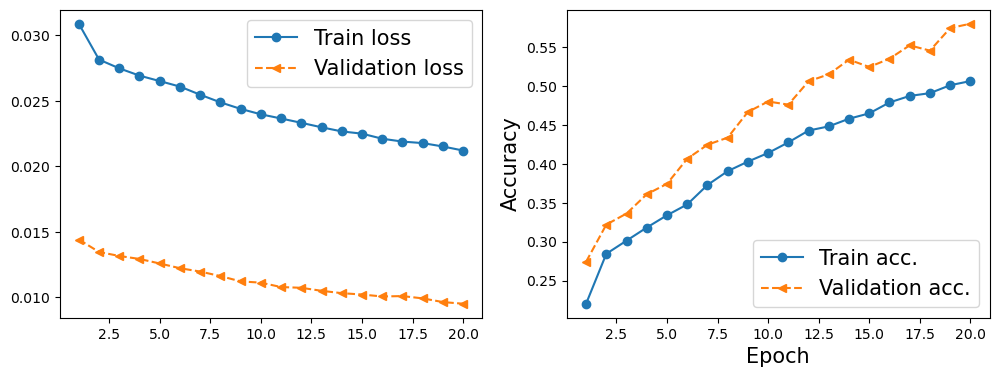

In [ ]:
plot_learning_curves(hist_AlexNet)